In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('lofi.csv')

In [3]:
df.head()

,BPM,ENERGY,DANCE,LOUD,VALENCE,LENS,ACOUSTIC,STAT
0,216,14,40,-13,18,141.0,80,2
1,206,89,38,-9,80,247.0,3,1
2,204,41,62,-12,74,252.0,68,1
3,204,47,24,-8,39,205.0,31,1
4,203,64,26,-10,38,281.0,20,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_') 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') 

In [5]:
df.describe().round()

,bpm,energy,dance,loud,valence,lens,acoustic,stat
count,2896.0,2896.0,2896.0,2896.0,2896.0,2895.0,2896.0,2896.0
mean,114.0,44.0,60.0,-11.0,39.0,193.0,45.0,1.0
std,32.0,25.0,15.0,4.0,25.0,94.0,33.0,0.0
min,32.0,0.0,10.0,-29.0,3.0,55.0,0.0,1.0
25%,85.0,25.0,51.0,-14.0,18.0,120.0,13.0,1.0
50%,110.0,38.0,61.0,-11.0,33.0,179.0,44.0,1.0
75%,136.0,64.0,71.0,-8.0,56.0,249.0,77.0,2.0
max,216.0,100.0,96.0,-2.0,99.0,1412.0,99.0,2.0


In [6]:
df[df.duplicated()]

,bpm,energy,dance,loud,valence,lens,acoustic,stat
47,180,23,38,-14,59,64.0,14,2
48,180,23,38,-14,59,64.0,14,2
49,180,23,38,-14,59,64.0,14,2
50,180,23,38,-14,59,64.0,14,2
51,180,23,38,-14,59,64.0,14,2
...,...,...,...,...,...,...,...,...
2873,65,33,45,-13,4,90.0,18,2
2874,65,33,45,-13,4,90.0,18,2
2875,65,33,45,-13,4,90.0,18,2
2876,65,33,45,-13,4,90.0,18,2


In [7]:
df.drop_duplicates()

,bpm,energy,dance,loud,valence,lens,acoustic,stat
0,216,14,40,-13,18,141.0,80,2
1,206,89,38,-9,80,247.0,3,1
2,204,41,62,-12,74,252.0,68,1
3,204,47,24,-8,39,205.0,31,1
4,203,64,26,-10,38,281.0,20,1
...,...,...,...,...,...,...,...,...
2891,49,37,39,-11,51,293.0,21,1
2892,47,4,52,-16,82,92.0,88,2
2893,38,18,81,-12,47,100.0,16,2
2894,37,25,27,-12,13,207.0,80,1


In [8]:
df.isnull()

,bpm,energy,dance,loud,valence,lens,acoustic,stat
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2891,False,False,False,False,False,False,False,False
2892,False,False,False,False,False,False,False,False
2893,False,False,False,False,False,False,False,False
2894,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

bpm         0
energy      0
dance       0
loud        0
valence     0
lens        1
acoustic    0
stat        0
dtype: int64

In [10]:
df.lens = df.lens.fillna(df.lens.mean())

In [11]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [12]:
len(df_train), len(df_val), len(df_test)

(1737, 579, 580)

In [13]:
y_train = (df_train.stat == 2).values
y_val = (df_val.stat == 2).values

In [14]:
del df_train['stat']
del df_val['stat']

In [15]:
dict_train = df_train.to_dict(orient='rows')
dict_val = df_val.to_dict(orient='rows')

C:\Users\lagoo\anaconda3\lib\site-packages\pandas\core\frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [16]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import roc_auc_score
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [19]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9470788530465949

In [20]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, 25, 30, 35, 40, 45, 50, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%2s -> %.5f' % (depth, auc))

 1 -> 0.93966
 2 -> 0.96647
 3 -> 0.97802
 4 -> 0.97115
 5 -> 0.95903
 6 -> 0.93803
10 -> 0.94541
15 -> 0.94541
20 -> 0.94541
25 -> 0.94541
30 -> 0.94375
35 -> 0.94875
40 -> 0.94875
45 -> 0.94541
50 -> 0.94708
None -> 0.94708


In [21]:
for m in [2, 3, 4, 5]:
    print('depth: %s' % m)
    
    for s in [1, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 175, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.5f' % (s, auc))
        
    print()

depth: 2
1 -> 0.96647
5 -> 0.96647
10 -> 0.96647
15 -> 0.96647
20 -> 0.96647
25 -> 0.96647
50 -> 0.97036
75 -> 0.97014
100 -> 0.96664
125 -> 0.96869
150 -> 0.96790
175 -> 0.96744
200 -> 0.97676

depth: 3
1 -> 0.97802
5 -> 0.97898
10 -> 0.97891
15 -> 0.97802
20 -> 0.97802
25 -> 0.97802
50 -> 0.98042
75 -> 0.97686
100 -> 0.97581
125 -> 0.97583
150 -> 0.97524
175 -> 0.97403
200 -> 0.98232

depth: 4
1 -> 0.97115
5 -> 0.98426
10 -> 0.98272
15 -> 0.98312
20 -> 0.98336
25 -> 0.98320
50 -> 0.98736
75 -> 0.97951
100 -> 0.97908
125 -> 0.97912
150 -> 0.97716
175 -> 0.97548
200 -> 0.98232

depth: 5
1 -> 0.95903
5 -> 0.98225
10 -> 0.98195
15 -> 0.97955
20 -> 0.98832
25 -> 0.98621
50 -> 0.98937
75 -> 0.98146
100 -> 0.98157
125 -> 0.97912
150 -> 0.97716
175 -> 0.97548
200 -> 0.98232



In [22]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9893667861409797

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9865352449223418

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9934109916367981

depth: 5
10 -> 0.993
20 -> 0.994
30 -> 0.995
40 -> 0.995
50 -> 0.995
60 -> 0.995
70 -> 0.996
80 -> 0.995
90 -> 0.995
100 -> 0.996
110 -> 0.995
120 -> 0.996
130 -> 0.996
140 -> 0.996
150 -> 0.996
160 -> 0.996
170 -> 0.996
180 -> 0.996
190 -> 0.996
200 -> 0.996

depth: 10
10 -> 0.991
20 -> 0.996
30 -> 0.996
40 -> 0.996
50 -> 0.996
60 -> 0.996
70 -> 0.996
80 -> 0.997
90 -> 0.997
100 -> 0.996
110 -> 0.997
120 -> 0.997
130 -> 0.997
140 -> 0.996
150 -> 0.997
160 -> 0.997
170 -> 0.997
180 -> 0.997
190 -> 0.997
200 -> 0.997

depth: 20
10 -> 0.991
20 -> 0.996
30 -> 0.996
40 -> 0.996
50 -> 0.995
60 -> 0.995
70 -> 0.996
80 -> 0.996
90 -> 0.996
100 -> 0.996
110 -> 0.996
120 -> 0.996
130 -> 0.996
140 -> 0.996
150 -> 0.996
160 -> 0.996
170 -> 0.997
180 -> 0.997
190 -> 0.997
200 -> 0.997



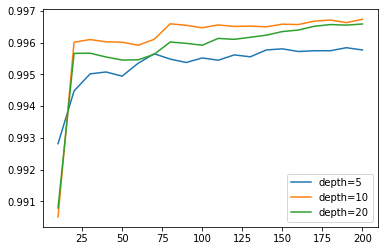

In [25]:
all_aucs = {} 
for depth in [5, 10, 20]: 
    print('depth: %s' % depth)
    aucs = [] 
    for i in range(10, 201, 10): 
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1) 
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred) 
        print('%s -> %.3f' % (i, auc)) 
        aucs.append(auc) 
    all_aucs[depth]=aucs 
    print()
    
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

min_samples_leaf: 5
10 -> 0.995
20 -> 0.996
30 -> 0.995
40 -> 0.996
50 -> 0.996
60 -> 0.996
70 -> 0.996
80 -> 0.996
90 -> 0.996
100 -> 0.996
110 -> 0.996
120 -> 0.996
130 -> 0.996
140 -> 0.996
150 -> 0.996
160 -> 0.996
170 -> 0.996
180 -> 0.996
190 -> 0.996
200 -> 0.996

min_samples_leaf: 10
10 -> 0.995
20 -> 0.995
30 -> 0.995
40 -> 0.995
50 -> 0.995
60 -> 0.995
70 -> 0.995
80 -> 0.995
90 -> 0.995
100 -> 0.995
110 -> 0.995
120 -> 0.996
130 -> 0.996
140 -> 0.996
150 -> 0.996
160 -> 0.995
170 -> 0.995
180 -> 0.995
190 -> 0.995
200 -> 0.995

min_samples_leaf: 20
10 -> 0.994
20 -> 0.993
30 -> 0.994
40 -> 0.994
50 -> 0.994
60 -> 0.994
70 -> 0.995
80 -> 0.994
90 -> 0.995
100 -> 0.995
110 -> 0.995
120 -> 0.995
130 -> 0.995
140 -> 0.994
150 -> 0.995
160 -> 0.995
170 -> 0.995
180 -> 0.995
190 -> 0.995
200 -> 0.995

min_samples_leaf: 50
10 -> 0.991
20 -> 0.992
30 -> 0.992
40 -> 0.992
50 -> 0.992
60 -> 0.992
70 -> 0.993
80 -> 0.992
90 -> 0.992
100 -> 0.992
110 -> 0.992
120 -> 0.992
130 -> 0.992
1

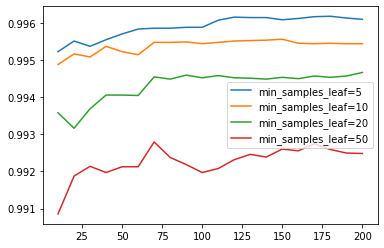

In [26]:
all_aucs = {}
for m in [5, 10, 20, 50]:
    print('min_samples_leaf: %s' % m)
    aucs = []
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m,
        random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    all_aucs[m] = aucs
    print()
    
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.plot(num_trees, all_aucs[20], label='min_samples_leaf=20')
plt.plot(num_trees, all_aucs[50], label='min_samples_leaf=50')
plt.legend()

In [27]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5,
random_state=1) 
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.99610513739546

In [28]:
def predict_single(track, dv, rf):
    samp=track_info(track)
    X = dv.transform([samp]) 
    y_pred = rf.predict_proba(X)[0, 1]
    predict =  y_pred
    if predict >= 0.5:
        predict_string = "yes, it's lofi"
    else:
        predict_string = "nope, it's not lofi"
    return predict_string

In [30]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(                              client_id=  "9f133c4fea4142498c182dc76383ce4d",
                                                                                        client_secret= "84511eaa3a0c4ef6aaf6350ec8ff4d1b"))

def track_info(tracks) :
        audio_features = sp.audio_features(tracks)[0]
        samp={
        'bpm':  round(audio_features['tempo']),
        'energy': round(audio_features['energy']*100),
        'dance': round(audio_features['danceability']*100),
        'loud': round(audio_features['loudness']),
        'valence':  round(audio_features['valence']*100),
        'lens': round(audio_features['duration_ms']/1000), 
        'acoustic':round(audio_features['acousticness']*100)
        }
        return samp
    


  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


You should consider upgrading via the 'c:\users\lagoo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [31]:
track=['https://open.spotify.com/track/4VZH6OfxPy1nNE7KbtVKyK?si=65800982091747ca']
predict_single(track, dv, rf)

"nope, it's not lofi"

In [32]:
import pickle
with open('lofi.bin', 'wb') as f_out: 
    pickle.dump((dv, rf), f_out) 
    
with open('lofi.bin', 'rb') as f_in:
    dv, rf = pickle.load(f_in)